In [1]:
class Rectangle(object):
    def __init__(self, px, py, w, h):
        self.px = px
        self.py = py
        self.w  = w
        self.h  = h
    
    def get_distance(self, x, y):
        return max(abs(self.px - x) - self.w/2, abs(self.py - y) - self.h/2)

In [2]:
class Circle(object):
    def __init__(self, px, py, r):
        self.px = px
        self.py = py
        self.r  = r
    
    def get_distance(self, x, y):
        return math.sqrt((self.px - x)**2 + (self.py - y)**2) - self.r

In [3]:
class Union(object):
    def __init__(self, objs=None):
        if not objs:
            self.objs = []
        else:
            self.objs = objs
    
    def get_distance(self, x, y):
        d = [o.get_distance(x,y) for o in self.objs]
        return min(d)

In [4]:
class Intersection(object):
    def __init__(self, objs=None):
        if not objs:
            self.objs = []
        else:
            self.objs = objs
    
    def get_distance(self, x, y):
        d = [o.get_distance(x,y) for o in self.objs]
        return max(d)

In [5]:
class Subtraction(object):
    def __init__(self, a, b):
        self.a = a
        self.b = b
    
    def get_distance(self, x, y):
        da = self.a.get_distance(x,y)
        db = self.b.get_distacne(x,y)
        return max(da, -db)

In [6]:
class Lattice(object):
    def __init__(self, wl=1.):
        self.wl = wl
    
    def get_distance(self, x, y):
        d = math.sin(x * math.pi / self.wl) + math.sin(y * math.pi / self.wl)
        return abs(d)-0.4

In [7]:
class Shell(object):
    def __init__(self, obj=None, d=1.):
        self.obj = obj
        self.d = d
    
    def get_distance(self, x, y):
        return abs(self.obj.get_distance(x, y)) - self.d

In [8]:
class Overlay(object):
    def __init__(self, a, b, f):
        self.a = a
        self.b = b
        self.f = f
    
    def get_distance(self, x, y):
        da = self.a.get_distance(x,y)
        db = self.b.get_distance(x,y)
        return da + self.f * db

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import measure
import math
import random

In [12]:
list_of_circles = []
for i in range(10):
    c = Circle(random.random()*10, random.random()*10, 1 + random.random()*2)
    list_of_circles.append(c)
u = Union(list_of_circles)

In [13]:
n = 65
mcs = np.empty((n, n))
for x in range(n):
    for y in range(n):
        cx = x / n * 10
        cy = y / n * 10
        d = u.get_distance(cx, cy)
        mcs[y, x] = d

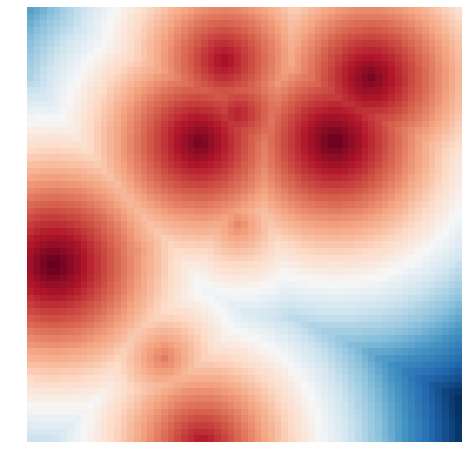

In [14]:
plt.figure(figsize=(8, 8))
plt.axis('off')
plt.imshow(mcs, cmap='RdBu')

In [39]:
l = Lattice(0.9)
ml = np.empty((n, n))
for x in range(n):
    for y in range(n):
        cx = x / n * 10
        cy = y / n * 10
        d = l.get_distance(cx, cy)
        ml[y, x] = d

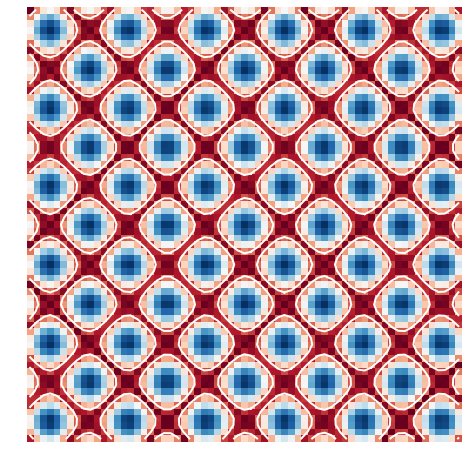

In [40]:
contours = measure.find_contours(ml, 0.)
plt.figure(figsize=(8,8))
plt.axis('off')
plt.imshow(ml, cmap='RdBu')
for i, contour in enumerate(contours):
    plt.plot(contour[:, 1], contour[:, 0], linewidth=2, c='w')

In [36]:
intersection = Intersection([l, u])
shell = Shell(u, 0.2)
union2 = Union([intersection, shell])

In [25]:
complete = np.empty((n,n))
for x in range(n):
    for y in range(n):
        cx = x / n * 10
        cy = y / n * 10
        d = union2.get_distance(cx, cy)
        complete[y, x] = d

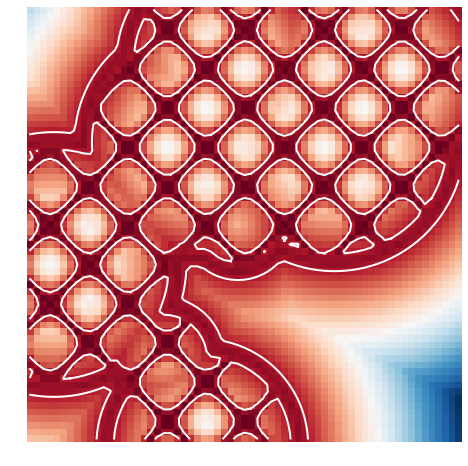

In [26]:
contours = measure.find_contours(complete, 0.)
plt.figure(figsize=(8,8))
plt.axis('off')
plt.imshow(complete, cmap='RdBu')
for i, contour in enumerate(contours):
    plt.plot(contour[:, 1], contour[:, 0], linewidth=2, c='w')